In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#importing manager csv
female_own = pd.read_csv('Data/participation_in_ownership.csv')
female_own.head()

,country,country_code,new_code,latitude,longitude,indicator_name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,AW,12.521110,-69.968338,participation in ownership,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,AF,33.939110,67.709953,participation in ownership,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,AO,-11.202692,17.873887,participation in ownership,0.0,56.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,ALB,AL,41.153332,20.168331,participation in ownership,0.0,0.0,0.0,0.0,13.1,0.0,0.0,0.0,0.0,0.0,20.7
4,Andorra,AND,AD,42.546245,1.601554,participation in ownership,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#removing additional years
female_own_2019=female_own[["new_code", "2019"]]
female_own_2019.head()

,new_code,2019
0,AW,0.0
1,AF,0.0
2,AO,0.0
3,AL,20.7
4,AD,0.0


In [6]:
#renaming 2019

female_own_2019_final=female_own_2019.rename(columns = {
    "2019" :"own"
})
female_own_2019_final.head()

,new_code,own
0,AW,0.0
1,AF,0.0
2,AO,0.0
3,AL,20.7
4,AD,0.0


In [7]:
#importing parliament
female_parliament = pd.read_csv('Data/parliament_seats.csv')
female_parliament.head()

,country,country_code,new_code,latitude,longitude,indicator_name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,ALB,AL,41.153332,20.168331,parliament,16.428571,16.428571,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197
1,Algeria,DZA,DZ,28.033886,1.659626,parliament,7.712082,7.712082,7.969152,31.601732,31.601732,31.601732,31.601732,31.601732,25.757576,25.757576,25.757576
2,Andorra,AND,AD,42.546245,1.601554,parliament,35.714286,35.714286,50.000000,50.000000,50.000000,50.000000,39.285714,32.142857,32.142857,32.142857,46.428571
3,Angola,AGO,AO,-11.202692,17.873887,parliament,38.636364,38.636364,38.181818,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000
4,Antigua and Barbuda,ATG,AG,17.060816,-61.796428,parliament,10.526316,10.526316,10.526316,10.526316,10.526316,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111


In [8]:
#reducing columns
female_parliament_2019=female_parliament[["new_code", "2019"]]
female_parliament_2019.head()

,new_code,2019
0,AL,29.508197
1,DZ,25.757576
2,AD,46.428571
3,AO,30.000000
4,AG,11.111111


In [9]:
#renaming 2019
female_parliament_2019_final=female_parliament_2019.rename(columns = {
    "2019" :"parliament"
})
female_parliament_2019_final.head()


,new_code,parliament
0,AL,29.508197
1,DZ,25.757576
2,AD,46.428571
3,AO,30.000000
4,AG,11.111111


In [11]:
own_regression=pd.merge(female_parliament_2019_final, female_own_2019_final, how='inner', on=["new_code", "new_code"])

In [12]:
own_regression

,new_code,parliament,own
0,AL,29.508197,20.7
1,DZ,25.757576,0.0
2,AD,46.428571,0.0
3,AO,30.000000,0.0
4,AG,11.111111,0.0
...,...,...,...
129,UZ,16.000000,25.9
130,VU,0.000000,0.0
131,VN,26.720648,0.0
132,ZM,17.964072,41.5


In [14]:
X = own_regression["parliament"].values.reshape(-1, 1)
y = own_regression["own"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (134, 1) (134, 1)


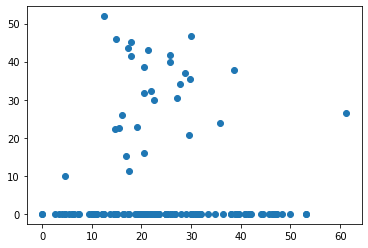

In [15]:
plt.scatter(X,y)

In [16]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.0380717]]
y-axis intercept:  [7.82540901]


In [19]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[61.25]]


In [20]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5, 1.0, 'Female Owners')

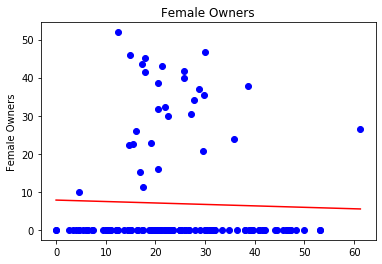

In [22]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
#plt.xlabel('your xlabel')
plt.ylabel('Female Owners')
plt.title('Female Owners')

In [24]:
#trying the above but removing counties with 0 for both
own_regression2=own_regression[(own_regression["parliament"]>0)]
own_regression_final=own_regression2[(own_regression2["own"]>0)]
own_regression_final

,new_code,parliament,own
0,AL,29.508197,20.7
8,AZ,16.806723,15.3
18,BG,25.833333,41.7
27,HR,20.529801,31.7
29,CY,17.857143,45.1
30,CZ,22.500000,29.9
38,EE,29.702970,35.5
42,GE,14.765101,22.4
50,HU,12.562814,51.9
57,IT,35.714286,24.0


In [27]:
X = own_regression_final["parliament"].values.reshape(-1, 1)
y = own_regression_final["own"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (29, 1) (29, 1)


In [28]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [29]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.09075476]]
y-axis intercept:  [29.77278227]


In [31]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[4.6875]]
Max X Value: [[61.25]]


In [32]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5, 1.0, 'Female Ownership')

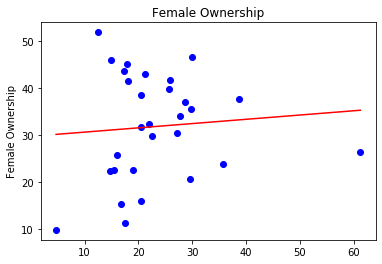

In [35]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
#plt.xlabel('your xlabel')
plt.ylabel('Female Ownership')
plt.title('Female Ownership')